# Métodos estatísticos para análise de ações

## Bibliotecas importadas

In [2]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr 
import pandas_datareader.data as web
import datetime 
import matplotlib.pyplot as plt 

plt.style.use('seaborn')

Definição do intervalo de tempo para análise de dados:

In [4]:
start = datetime.datetime(2015, 1, 1)
end = datetime.datetime(2019, 1, 1)

A amostra de dados será composta pelos preços de ações da IBM desde 01 de janeiro de 2015 até 01 de janeiro de 2019. Os dados serão obtidos da API yahoo finance.

In [5]:
ibm = web.DataReader('IBM', 'yahoo', start, end)

In [6]:
ibm.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-24,106.118546,102.772469,105.066925,102.839386,3997184.0,87.719414
2018-12-26,106.491394,101.281075,103.250481,106.491394,6951507.0,90.834496
2018-12-27,108.776291,104.655830,105.152962,108.776291,6323698.0,92.783447
2018-12-28,109.751434,107.552582,109.196938,108.059273,5352905.0,92.171852
2018-12-31,109.321220,107.476097,108.346077,108.671127,5212009.0,92.693741


In [7]:
ibm.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,156.128113,153.919693,154.216064,154.933075,5779673.0,113.538879
2015-01-05,154.177826,152.189301,154.177826,152.495224,5104898.0,111.752350
2015-01-06,152.925430,148.346085,152.648178,149.206497,6429448.0,109.342300
2015-01-07,150.286804,147.256210,150.286804,148.231354,4918083.0,108.627678
2015-01-08,152.045883,148.709366,149.369019,151.453156,4431693.0,110.988670


Estatísticas básicas:

In [21]:
print(f"Média: {ibm['Close'].mean():.4f}")
print(f"Mediana: {ibm['Close'].median():.4f}")
print(f"Moda: {ibm['Close'].mode().loc[0]:.4f}")

Média: 145.1695
Mediana: 145.7983
Moda: 140.0382


Criação do histrograma da distribuição retornos simples

In [23]:
ibm_returns = ibm['Close'].pct_change()
ibm_returns.head()

Date
2015-01-02         NaN
2015-01-05   -0.015735
2015-01-06   -0.021566
2015-01-07   -0.006536
2015-01-08    0.021735
Name: Close, dtype: float64

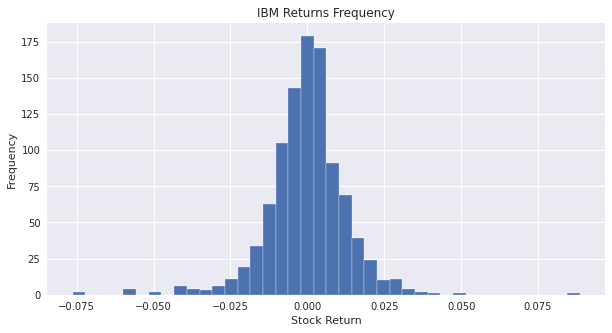

In [33]:
N = ibm_returns.shape[0]
k = int(np.round(1 + 3.3222 * np.log10(N)))

ax = ibm_returns.hist(bins=40, edgecolor='white', figsize=(10,5))
ax.set_xlabel('Stock Return')
ax.set_ylabel('Frequency')
ax.set_title('IBM Returns Frequency')
plt.show()


Histograma dos retornos logarítmicos

In [35]:
ibm_log_returns = np.log(ibm['Close'] / ibm['Close'].shift(1))

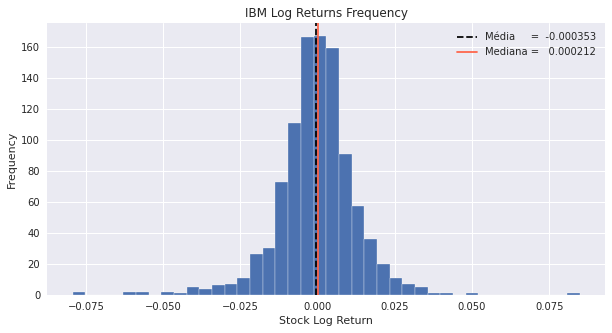

In [70]:
median = ibm_log_returns.median()
mean = ibm_log_returns.mean()

ax = ibm_log_returns.hist(bins=40, edgecolor='white', figsize=(10,5))
ax.axvline(mean, color='black',  linestyle='dashed', label=f'Média     = {mean:>10.6f}')
ax.axvline(median, color='tomato', label=f'Mediana = {median:>10.6f}')

ax.set_xlabel('Stock Log Return')
ax.set_ylabel('Frequency')
ax.set_title('IBM Log Returns Frequency')
plt.legend()
plt.show()


Note-se que a média e a media dos retornos logarítmicos são levemente diferentes. De fato, a distribuição desses dados apresenta uma assimetria negativa igual a: 

In [71]:
ibm_log_returns.skew()

-0.6582895096911845

Além da assimetria, calculada acima, outra importante medida descritiva dos dados é a curtose. Para os retornos logarítmicos, a curtose é igual a:

In [72]:
ibm_log_returns.kurtosis()

6.257142458760562

Intervalo Interquartil e _boxplots_

O intergalo interquartil ($IQR$) é uma forma simples de verificar a dispersão dos dados. Essa medida de espalhamento é dada pela fórmula
$$IQR = Q_3 - Q_1$$
onde $Q_1$ e $Q_3$ são respectivamente o primeiro e o terceiro quartis.

O intervalo interquartil é comumente utilizado para detecção de _outliers_ de uma distribuição de dados. No caso da distribuição de preços de fechamento, temos:

In [76]:
q1 = ibm['Close'].quantile(0.25)
q3 = ibm['Close'].quantile(0.75)
iqr = q3 - q1
outliers_low = q1 - 1.5 * iqr
outliers_high = q3 + 1.5 * iqr

In [77]:
print(outliers_low, outliers_high)

116.26792526245117 175.5509147644043


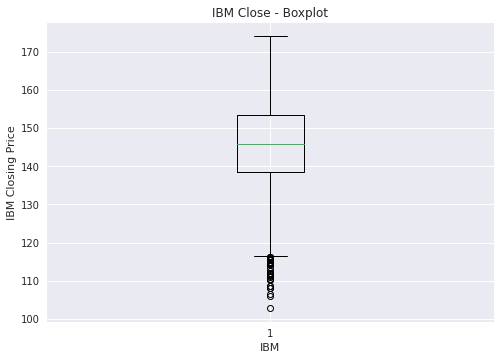

In [75]:
ax = plt.boxplot(ibm['Close'])
plt.title('IBM Close - Boxplot')
plt.xlabel('IBM')
plt.ylabel('IBM Closing Price')

plt.show()

## Gráficos de Densidade por Kernel e Volatilidade

### Variância

Além do Intervalo Interquaril, a dispersão de daddos pode ser medida pela variância ($\sigma^2$) e pelo Desvio Padrão ($\sigma$). A fórmula da variância é mostrada abaixo:

$$\sigma^2 = \sum \dfrac{(x - \bar{x})}{n}$$
em que:

- $x$: dado pontual
- $\bar{x}$: média dos dados
- $n$: quantidade de dados

O desvio padrão é simplesmente a raiz quadrada da variância, ou seja:

$$\sigma = \sqrt{\sigma^2} = \sqrt{\sum \dfrac{(x - \bar{x})}{n}}$$

Para a distribuição de retornos logarítmicos, o desvio padrão e a variância são iguais a:

In [78]:
var = ibm_log_returns.var()
std = ibm_log_returns.std()

print(f"""
Desvio padão: {std:.3f}
Variância: {var:.6f}
""")


Desvio padão: 0.013
Variância: 0.000171



Essas medidas dão uma indicação do risco do ativo analisado. Em finanças, o desvio padrão é frequentemente referido como **volatilidade**.

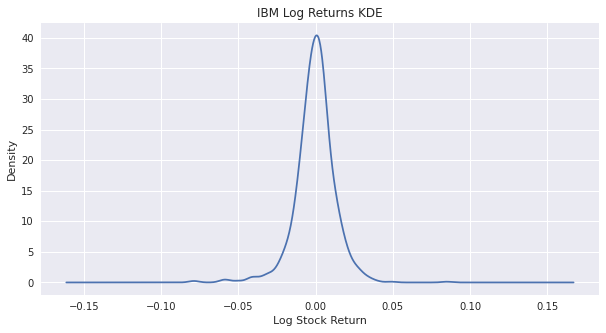

In [79]:
ibm_log_returns.plot(kind='kde', bw_method='scott', label='IBM', figsize=(10,5))
plt.xlabel('Log Stock Return')
plt.ylabel('Density')
plt.title('IBM Log Returns KDE')
plt.show()


## Covariância e Correlação

Quando tentamos compreender a relação entre diferentes ativos, duas abordagens quantitativas que podem ser úteis são a covariância e a correlação.

Dados dois ativos $a$ e $b$ com retornos respectivamente iguais a $R_a$ e $R_b$, a covariância é dada por:

$$Cov(R_a, R_b) = E\left\{ [R_a - E(R_a)][R_b - E(R_b)]  \right\}$$

In [80]:
start = datetime.datetime(2014, 1, 1)
end = datetime.datetime(2019, 1, 1)

In [88]:
nutanix = web.DataReader('NTNX', 'yahoo', start, end)
sp500 = web.DataReader('^GSPC', 'yahoo', start, end)

In [89]:
nutanix['Returns'] = nutanix['Close'].pct_change()
sp500['Returns'] = sp500['Close'].pct_change()

In [90]:
nutanix['Returns'] = nutanix['Returns'].dropna()
sp500['Returns'] = sp500['Returns'].dropna()

In [92]:
nutanix

,High,Low,Open,Close,Volume,Adj Close,Returns
Date,,,,,,,
2016-09-30,39.400002,26.100000,26.500000,37.000000,30011500,37.000000,NaN
2016-10-03,46.779999,37.500000,38.849998,44.459999,28809900,44.459999,0.201622
2016-10-04,43.400002,38.000000,43.099998,38.090000,9879400,38.090000,-0.143275
2016-10-05,40.860001,36.099998,40.099998,36.180000,8423500,36.180000,-0.050144
2016-10-06,37.700001,35.180000,35.770000,36.700001,5266600,36.700001,0.014373
...,...,...,...,...,...,...,...
2018-12-24,37.759998,35.240002,35.689999,36.130001,1480800,36.130001,-0.009323
2018-12-26,38.970001,36.509998,36.509998,38.919998,1774900,38.919998,0.077221
2018-12-27,39.910000,37.869999,38.230000,39.910000,1864800,39.910000,0.025437


In [91]:
nutanix_sp500 = pd.concat([nutanix['Returns'], sp500['Returns']], axis=1)
nutanix_sp500.columns = ['Nutanix Returns', 'SP500 Returns']
nutanix_sp500.head()

,Nutanix Returns,SP500 Returns
Date,,
2014-01-02,NaN,NaN
2014-01-03,NaN,-0.000333
2014-01-06,NaN,-0.002512
2014-01-07,NaN,0.006082
2014-01-08,NaN,-0.000212


In [93]:
covariance = nutanix_sp500.cov()
covariance

,Nutanix Returns,SP500 Returns
Nutanix Returns,0.001484,0.000119
SP500 Returns,0.000119,0.000069


### Correlação

$$Corr(R_a, R_b) = \dfrac{Cov(R_a, R_b)}{\sigma(R_a) \sigma(R_b)}$$

In [94]:
correlation = nutanix_sp500.corr()
correlation

,Nutanix Returns,SP500 Returns
Nutanix Returns,1.000000,0.391875
SP500 Returns,0.391875,1.000000


## Gráficos de dispersão e Mapas de calor

In [95]:
from pandas.plotting import scatter_matrix

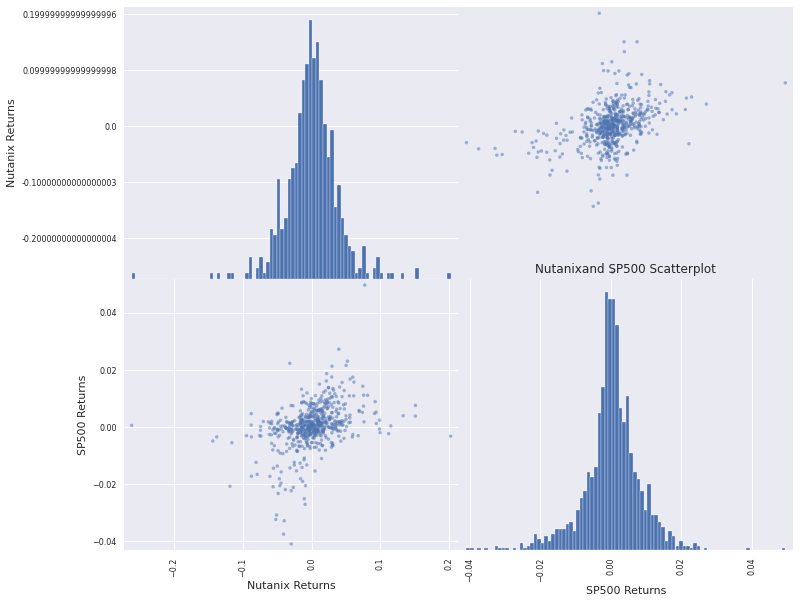

In [101]:
scatter_matrix(nutanix_sp500, figsize=(12, 10), alpha=0.5, hist_kwds={'bins':90, 'edgecolor':'white'})
_=plt.title('Nutanixand SP500 Scatterplot')
plt.show()

In [102]:
import seaborn as sns

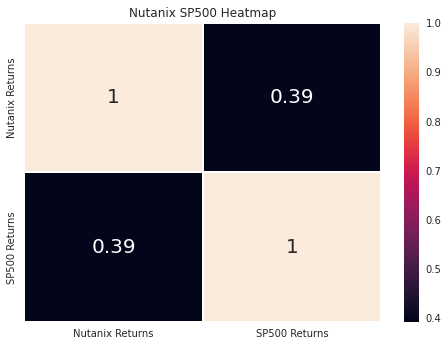

In [103]:
sns.heatmap(correlation, annot=True, cmap=None, linewidths=0.3, annot_kws={'size': 20})

_=plt.title('Nutanix SP500 Heatmap')

plt.show()